# Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Def. Variables
- - -
Paramétros dados por el enunciado y máscara de la segunda derivada *(véase el apartado de derivadas)*.

In [2]:
x = np.linspace(-10, 10, 300)
m = [-1,0,1]
m2 = [1,-2,1]
h = 0.05

def f(x):
    return (1/(np.sqrt(1+np.exp(-x**2))))

# Derivadas
- - -
##### Operador de la derivada central: 
- Derivada central (*`central`*):
$$\frac{f(x+h)-f(x-h)}{2h}.$$
- Operador central (*`op_central`*):
$$Df(x_n)=\frac{1}{2h}\sum_{m=-1}^{1}M[m+1]f(x_{n-m}).$$
- - -
##### Valor real (*`real_value`*):
$$f'(x)=\frac{xe^{(-x^2)}}{{(\sqrt{1+e^{-x^2}})}^3}.$$
- - -
*[punto 1.4a]* 
##### Segunda derivada (*`second`*):   

Sabemos que $$f''(x)=\frac{f(x+h)-2f(x)+f(x-h)}{h^2}.$$ Luego podemos denotar a la nueva máscara de la convolución como $m2=[1, -2, 1]$.  

Por consiguiente, es correcto afirmar que: $$D^2f(x_n)=\frac{1}{h^2}\sum_{m=-1}^{1}M[m+1]f(x_{n-m}).$$

In [3]:
class Derivate():
    def __init__(self,x,f):
        self.x=x
        self.f=f

    def central(self):
        return (f(x+h)-f(x-h))/(2*h)
    def real_value(self):
        return (x*np.exp(-x**2)) / ((np.sqrt(1+np.exp(-x**2)))**3)
    def op_central(self):
        sum = 0
        for i in m:
            sum+= f(x-i)*i
        return sum/(2*h)
    def second(self):
        sum = 0
        for i in range(-1,2):
            sum+= f(x-i)*m2[i+1]
        return sum/(2**h)

d=Derivate(x,f)

# Error Local
- - -
- `d_central` : Punto 1.2a
- `error` : Punto 1.2b

In [4]:
central_d = d.central()
error = np.abs(central_d-d.real_value())

#### Gráficas:

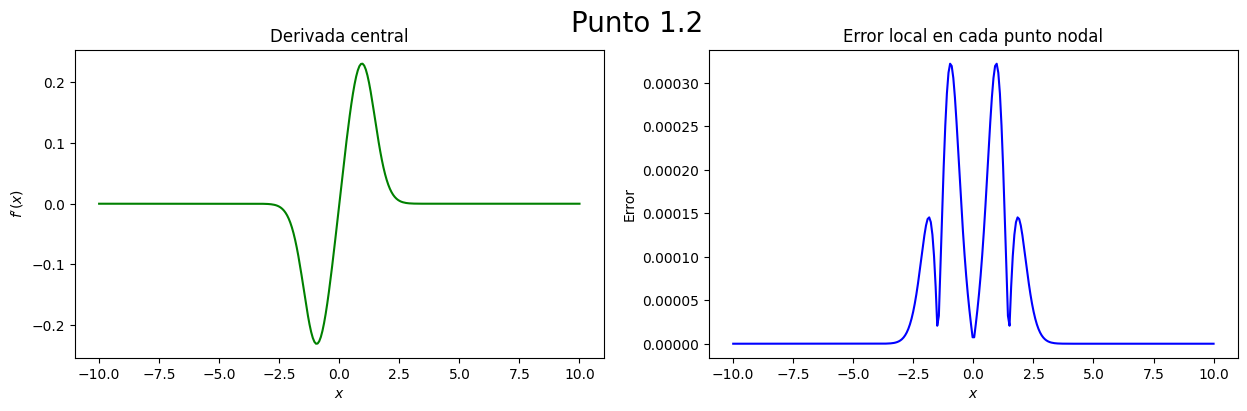

In [5]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, central_d, color='g')
ax.set_title("Derivada central")
ax.set_xlabel("$\it{x}$")
ax.set_ylabel("$\it{f\' (x)}$")
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(x, error, color = 'b')
ax2.set_title("Error local en cada punto nodal")
ax2.set_xlabel("$\it{x}$")
ax2.set_ylabel("Error")

plt.suptitle("Punto 1.2",fontsize=20)
plt.show()

# Op. Derivada Central
- - -
- `Op_Central` : Punto 1.3
- `Op_2_Central` : Punto 1.4b

In [6]:
Op_Central = d.op_central()
Op_2_Central = d.second()

#### Gráficas:

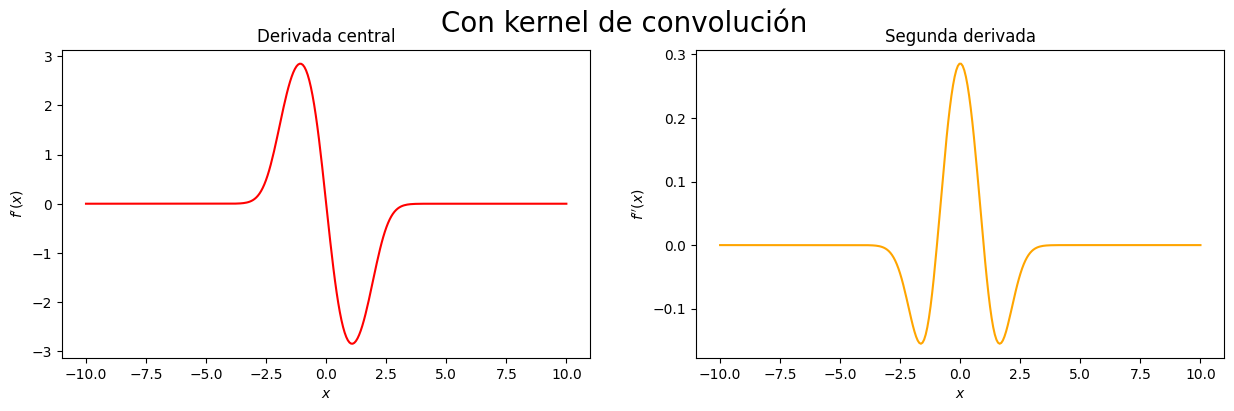

In [7]:
fig = plt.figure(figsize=(15, 4))
ax3 = fig.add_subplot(1, 2, 1)
ax3.plot(x, Op_Central, color='r')
ax3.set_title("Derivada central")
ax3.set_xlabel("$\it{x}$")
ax3.set_ylabel("$\it{f\' (x)}$")
ax4 = fig.add_subplot(1, 2, 2)
ax4.plot(x, Op_2_Central, color = 'orange')
ax4.set_title("Segunda derivada")
ax4.set_xlabel("$\it{x}$")
ax4.set_ylabel("$\it{f '' (x)}$")

plt.suptitle("Con kernel de convolución",fontsize=20)
plt.show()